# Rainfall Prediction - Weather Forecasting

<strong>Problem Statement:</strong>

<strong>Rain Prediction –Weather forecasting</strong>

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
<strong>1. Problem Statement: </strong>
- a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

- b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [516]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # Required to display all columns

In [517]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [518]:
df.shape

(8425, 23)

In [519]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [520]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [521]:
df.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-05-14,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


- Date  - The date of observation

- Location  -The common name of the location of the weather station

- MinTemp  -The minimum temperature in degrees celsius

- MaxTemp -The maximum temperature in degrees celsius

- Rainfall  -The amount of rainfall recorded for the day in mm

- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

- Sunshine  -The number of hours of bright sunshine in the day.

- WindGustDir- The direction of the strongest wind gust in the 24 hours to midnight

- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

- WindDir9am -Direction of the wind at 9am

- WindDir3pm -Direction of the wind at 3pm

- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

- Humidity9am -Humidity (percent) at 9am

- Humidity3pm -Humidity (percent) at 3pm

- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

- Cloud9am - Fraction of sky obscured by cloud at 9am. 

- Cloud3pm -Fraction of sky obscured by cloud 

- Temp9am-Temperature (degrees C) at 9am

- Temp3pm -Temperature (degrees C) at 3pm

- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Check Duplicates

In [523]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2822,2015-10-20,Williamtown,13.1,31.6,0.0,6.4,11.1,E,33.0,N,E,11.0,22.0,67.0,37.0,1021.4,1016.4,1.0,1.0,21.5,30.3,No,No
2823,2015-10-21,Williamtown,16.6,34.1,0.0,6.6,9.9,NNW,44.0,NW,ESE,15.0,22.0,54.0,39.0,1014.7,1010.6,1.0,5.0,24.7,30.2,No,Yes
2824,2015-10-22,Williamtown,17.5,26.3,19.8,7.8,NaN,SW,67.0,NaN,WNW,0.0,11.0,94.0,45.0,1012.4,1008.3,8.0,6.0,18.6,25.6,Yes,NaN
2825,2015-10-23,Williamtown,14.7,21.4,NaN,NaN,NaN,S,59.0,WSW,SSW,20.0,30.0,90.0,48.0,1021.4,1020.9,7.0,5.0,15.6,20.3,NaN,NaN
2826,2015-10-24,Williamtown,11.0,22.5,NaN,NaN,NaN,E,35.0,NW,E,11.0,20.0,65.0,60.0,1024.5,1021.4,NaN,NaN,18.4,21.4,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332,2012-01-25,Melbourne,20.3,25.0,0.0,11.6,7.3,S,39.0,S,SSW,17.0,17.0,77.0,60.0,1015.2,1014.0,8.0,2.0,20.8,23.8,No,No
5333,2012-01-26,Melbourne,16.1,24.5,0.0,4.4,12.4,S,50.0,S,S,13.0,31.0,67.0,55.0,1018.5,1016.9,NaN,NaN,18.9,23.7,No,NaN
5334,2012-01-27,Melbourne,16.6,30.7,NaN,8.0,13.0,SSE,39.0,WSW,SSE,9.0,19.0,69.0,55.0,1016.9,1013.5,NaN,NaN,20.5,26.3,NaN,NaN
5335,2012-01-28,Melbourne,20.0,30.4,NaN,8.2,12.1,SSE,37.0,SW,S,13.0,26.0,64.0,55.0,1012.7,1009.2,NaN,NaN,24.1,27.4,NaN,NaN


In [524]:
df.drop_duplicates(inplace=True)

In [525]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


So we have successfully removed all the duplicates now

In [526]:
df.shape

(6762, 23)

In [527]:
# Check nan column percentage
nan_columns = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
nan_columns

Date               0.0 %
Location           0.0 %
Temp9am           0.75 %
Humidity9am        0.8 %
MaxTemp           0.84 %
WindSpeed9am      0.93 %
MinTemp           1.04 %
Temp3pm           1.36 %
Humidity3pm       1.42 %
WindSpeed3pm      1.48 %
WindDir9am       11.74 %
WindGustDir      13.93 %
WindGustSpeed    13.93 %
Pressure9am      19.34 %
Pressure3pm      19.39 %
RainTomorrow      2.04 %
Rainfall          2.04 %
RainToday         2.04 %
Cloud9am          27.6 %
Cloud3pm         28.13 %
WindDir3pm        4.35 %
Evaporation       43.2 %
Sunshine         47.86 %
dtype: object

In [528]:
# Lets drop Evaporation and Sunshine because these have a high percentage of nan values
df.drop(['Evaporation', 'Sunshine'], axis = 1, inplace = True)

In [529]:
df.sample(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7581,2012-10-07,PerthAirport,10.3,20.8,0.0,SW,39.0,N,SSW,13.0,9.0,70.0,58.0,1017.9,1017.8,5.0,6.0,18.0,18.9,No,Yes


# Check categorical columns

In [530]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df[categorical_columns].isnull().sum()

Date              0
Location          0
WindGustDir     942
WindDir9am      794
WindDir3pm      294
RainToday       138
RainTomorrow    138
dtype: int64

In [531]:
categorical_columns_with_nan = [x for x in categorical_columns if df[x].isnull().sum()]
for col in categorical_columns_with_nan:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value,inplace=True)

In [532]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df[categorical_columns].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Now, there are no missing values in any categorical columns.

# Check numerical features

In [533]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
df[numerical_columns].isnull().sum()

MinTemp            70
MaxTemp            57
Rainfall          138
WindGustSpeed     942
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
dtype: int64

In [534]:
numerical_columns_with_nan = [x for x in numerical_columns if df[x].isnull().sum()]
for col in numerical_columns_with_nan:
    mean_value = df[col].mean()
    df[col].fillna(mean_value,inplace=True)

In [535]:
df.isnull().sum().sum()

0

Now, we see that we dont have any null data in the whole dataset.

RainTomorrow Counts :
 No     5190
Yes    1572
Name: RainTomorrow, dtype: int64


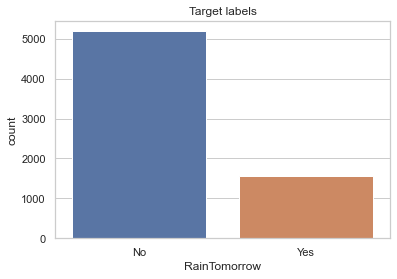

In [536]:
counts = df['RainTomorrow'].value_counts()
print('RainTomorrow Counts :'"\n",counts)

sns.set(style="whitegrid")
plt.title("Target labels")
sns.countplot(df.RainTomorrow)
plt.show()

So we see that data is imbalanced as we see that it will not rain tomorrow has 5190 records and it will rain tomorrow has 1572 records

In [537]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No


In [538]:
df['Date']=pd.to_datetime(df['Date'])
df['DayOfRainfall']=df['Date'].apply(lambda x:x.day)
df['MonthOfRainfall']=df['Date'].apply(lambda x:x.month)
df['YearOfRainfall']=df['Date'].apply(lambda x:x.year)

#Drop date column
df.drop('Date',inplace=True,axis=1)
df.sample(2)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DayOfRainfall,MonthOfRainfall,YearOfRainfall
7654,PerthAirport,16.5,33.8,0.0,ESE,52.0,E,WNW,30.0,24.0,44.0,27.0,1015.9,1010.9,0.0,0.0,23.3,31.4,No,No,19,1,2013
6637,Brisbane,8.2,22.9,0.0,NW,19.0,S,NNW,2.0,6.0,98.0,38.0,1021.8,1017.1,1.0,0.0,10.6,22.4,No,No,21,6,2012


In [539]:
set(df['Location'])

{'Adelaide',
 'Albury',
 'Brisbane',
 'CoffsHarbour',
 'Darwin',
 'Melbourne',
 'Newcastle',
 'Penrith',
 'PerthAirport',
 'Uluru',
 'Williamtown',
 'Wollongong'}

We see that we have data for above locatio, we will do analysis for both amount of rainfall and if it will rain tomorrow or not

<AxesSubplot:xlabel='Location', ylabel='count'>

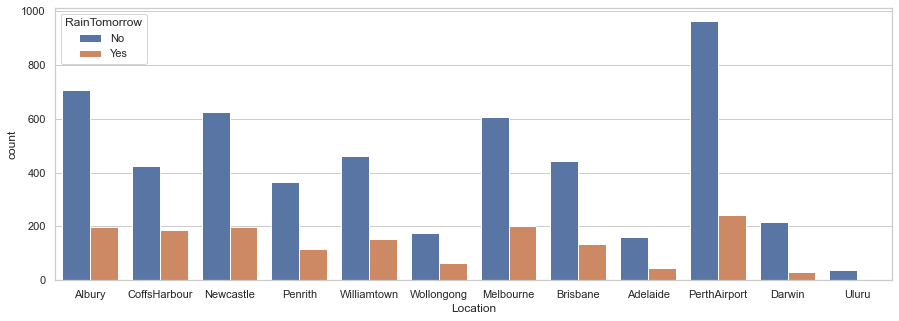

In [540]:
plt.figure(figsize=(15,5))
sns.countplot(x="Location",hue="RainTomorrow",data=df)

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

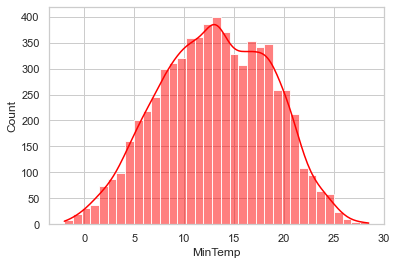

In [541]:
sns.histplot(df['MinTemp'],color="red",kde=True,stat="count")

In [542]:
df["MinTempGroups"]=np.where((df["MinTemp"]>=-2)&(df["MinTemp"]<=0),"Negative",
                         np.where((df["MinTemp"]>0)&(df["MinTemp"]<=10),"Very Low",
                         np.where((df["MinTemp"]>10)&(df["MinTemp"]<=13),"Low",
                         np.where((df["MinTemp"]>13)&(df["MinTemp"]<=18),"Medium","High"))))

<AxesSubplot:xlabel='MinTempGroups', ylabel='count'>

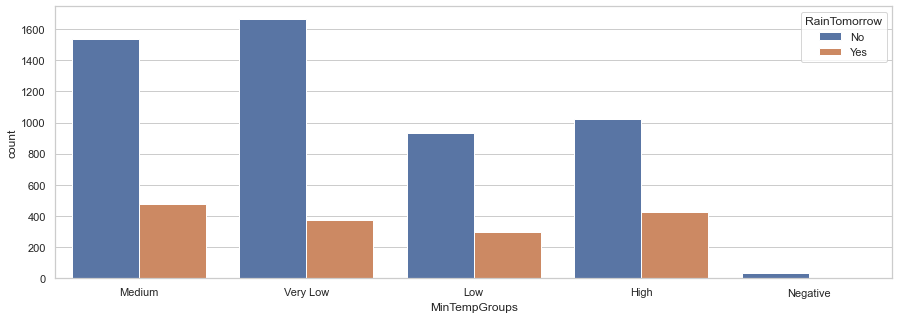

In [543]:
plt.figure(figsize=(15,5))
sns.countplot(x="MinTempGroups",hue="RainTomorrow",data=df)

- If the minimum temperate lies between Medium and High range, then the probability to rain tomorrow is more than very low and low temperature categories.
- Now we will delete the MinTempGroups now as it is not required now.

In [544]:
df.drop('MinTempGroups',axis=1,inplace=True)

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

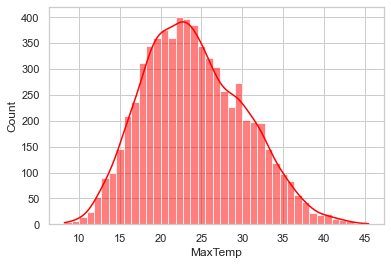

In [545]:
sns.histplot(df['MaxTemp'],color="red",kde=True,stat="count")

In [546]:
df["MaxTempGroups"]=np.where((df["MaxTemp"]>=8)&(df["MaxTemp"]<=20),"Very Low",
                         np.where((df["MaxTemp"]>20)&(df["MaxTemp"]<=24),"Low",
                         np.where((df["MaxTemp"]>24)&(df["MaxTemp"]<=28),"Moderate",
                         np.where((df["MaxTemp"]>28)&(df["MaxTemp"]<=45),"High","Hot"))))

<AxesSubplot:xlabel='MaxTempGroups', ylabel='count'>

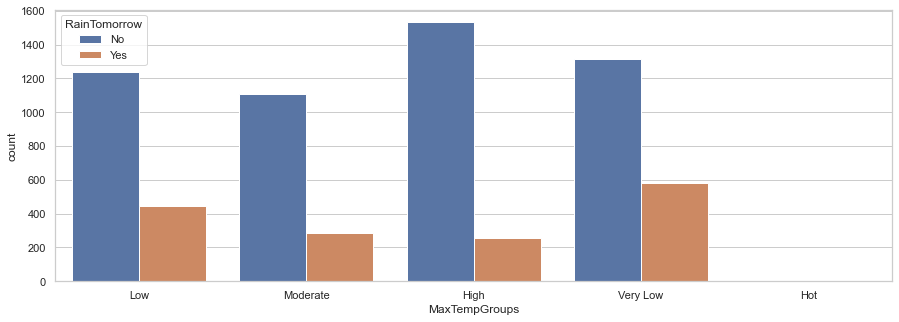

In [547]:
plt.figure(figsize=(15,5))
sns.countplot(x="MaxTempGroups",hue="RainTomorrow",data=df)

- If the maximum temperate lies between very low and low range, then the probability to rain tomorrow is more than moderate and High temperature categories.
- Now we will delete the MaxTempGroups now as it is not required now.

In [548]:
df.drop('MaxTempGroups',axis=1,inplace=True)

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

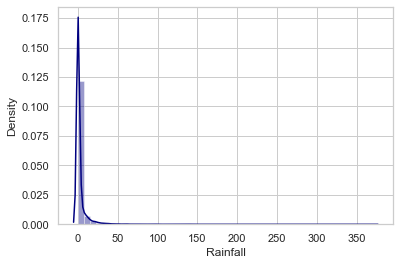

In [549]:
sns.distplot(df['Rainfall'],color="navy")

The maximum rainfall is between 0 to 1 and we see that the graph is skewed right and is not normally distributed.

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

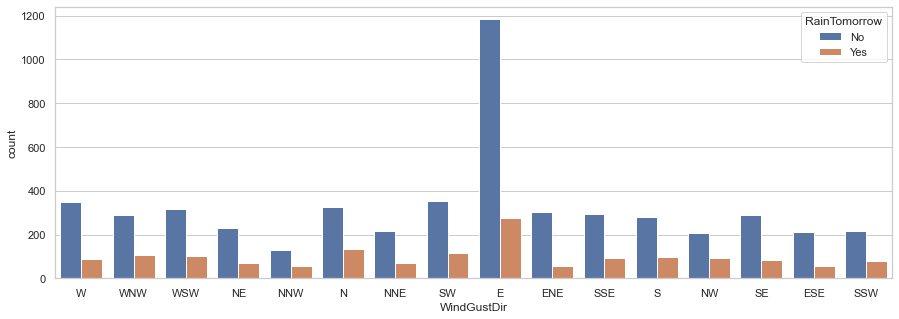

In [550]:
plt.figure(figsize=(15,5))
sns.countplot(x="WindGustDir",hue="RainTomorrow",data=df)

- If the WindGustDir is East, then the probability that it will rain tomorrow is more than other directions.
- Also lets divide this Direction in East,West,North,South and others.

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

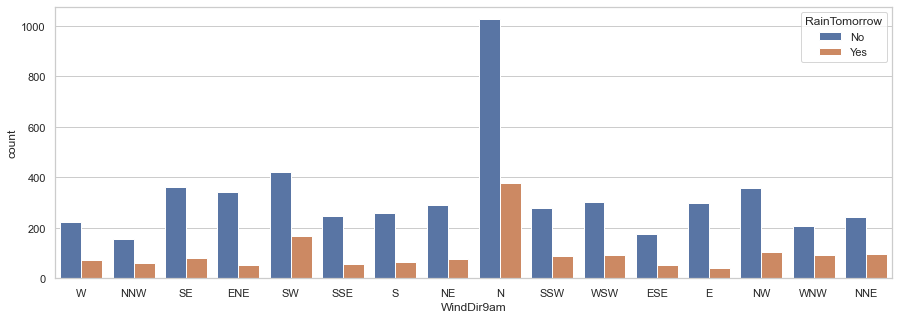

In [551]:
plt.figure(figsize=(15,5))
sns.countplot(x="WindDir9am",hue="RainTomorrow",data=df)

- If the WindGustDir is North, then the probability that it will rain tomorrow is more than other directions.

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

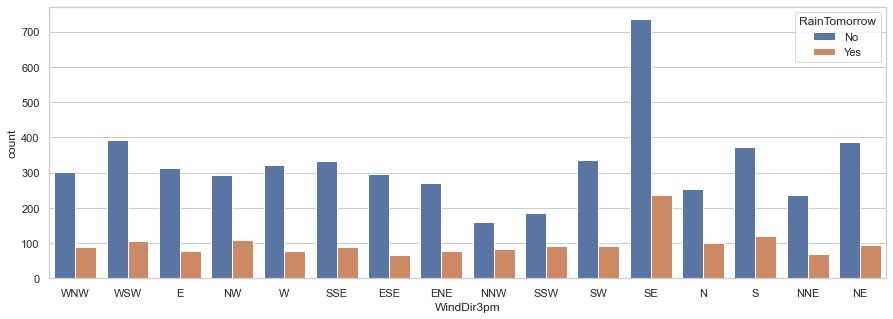

In [552]:
plt.figure(figsize=(15,5))
sns.countplot(x="WindDir3pm",hue="RainTomorrow",data=df)

If WindDirection at 3PM is maximum at South East, then prediction that it will rain tomorrow is more than other directions.

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

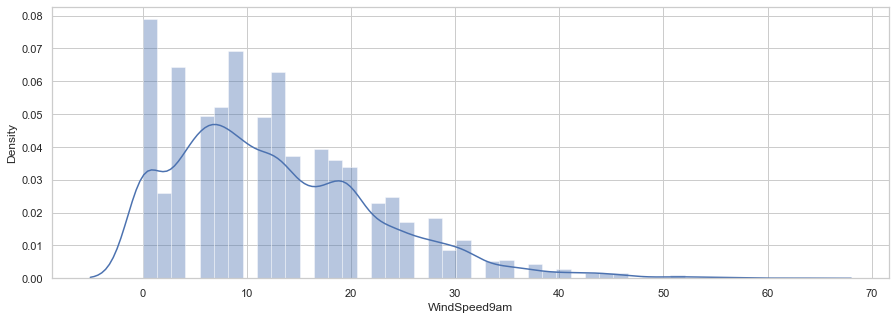

In [553]:
plt.figure(figsize=(15,5))
sns.distplot(df['WindSpeed9am'])

Windspeed at 9am(prior 10 min) is measured in km/hr and it ranges between 0 to 20km/hr and is right skewed and not normally distributed.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

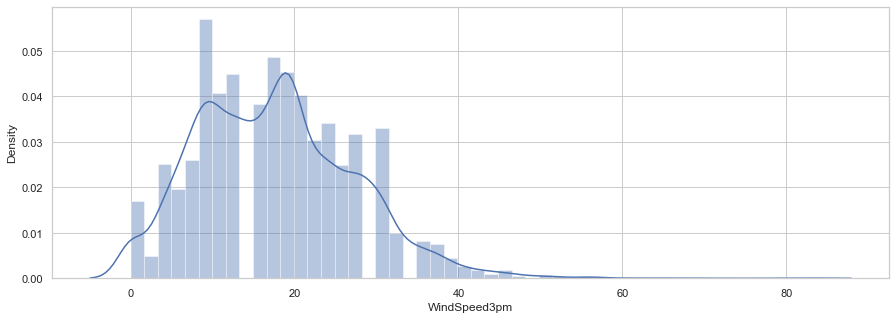

In [554]:
plt.figure(figsize=(15,5))
sns.distplot(df['WindSpeed3pm'])

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

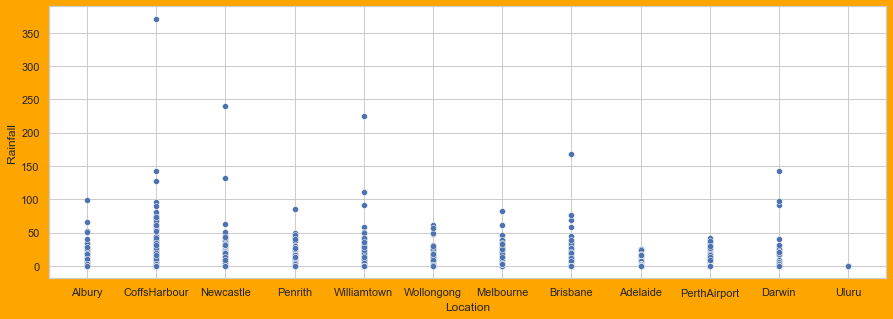

In [564]:
plt.figure(figsize=(15,5),facecolor='orange')
sns.scatterplot(x="Location",y="Rainfall",data=df)

From the graph, we see that rainfall is minimum in Uluru and Adelaide.

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

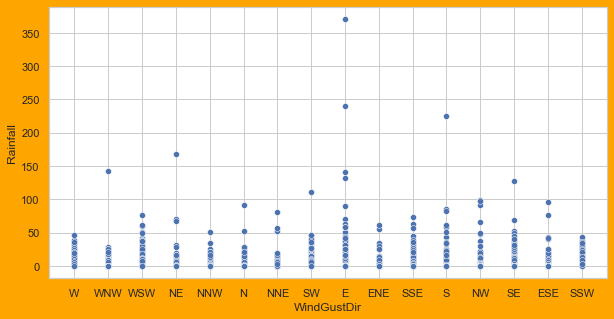

In [565]:
plt.figure(figsize=(10,5),facecolor='orange')
sns.scatterplot(x="WindGustDir",y="Rainfall",data=df)

From the graph, we see that East has the most rainfall, but all directions have rainfall.

<AxesSubplot:xlabel='MonthOfRainfall', ylabel='Rainfall'>

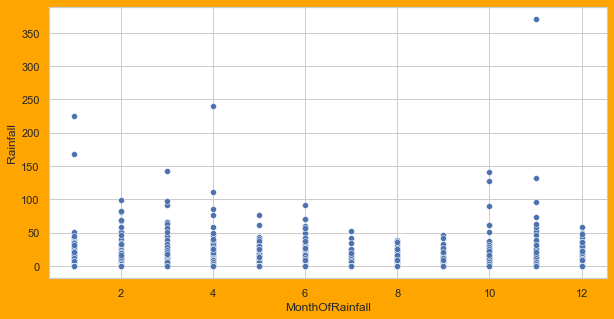

In [566]:
plt.figure(figsize=(10,5),facecolor='orange')
sns.scatterplot(x="MonthOfRainfall",y="Rainfall",data=df)

From the graph, we see that rainfall is there in every month

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

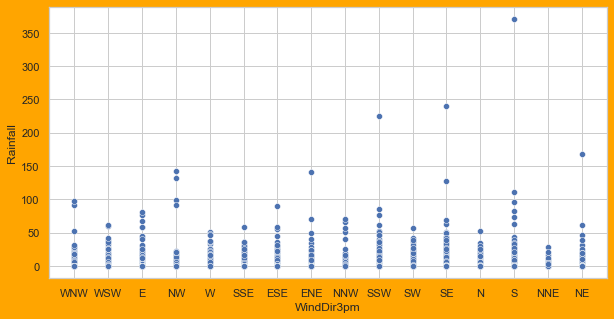

In [567]:
plt.figure(figsize=(10,5),facecolor='orange')
sns.scatterplot(x="WindDir3pm",y="Rainfall",data=df)

In the East,SE,SSW,ENE direction, we see the amount of rainfall is more.But we see rainfall in all directions.

<AxesSubplot:xlabel='WindDir9am', ylabel='Rainfall'>

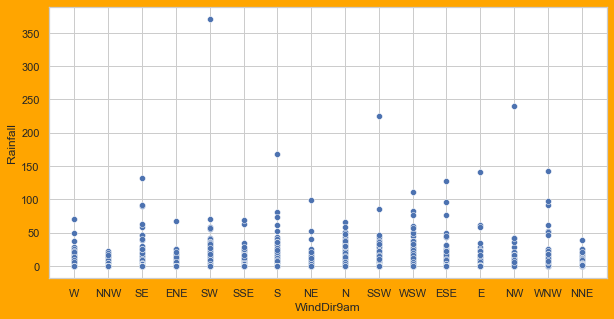

In [568]:
plt.figure(figsize=(10,5),facecolor='orange')
sns.scatterplot(x="WindDir9am",y="Rainfall",data=df)

In the North,WSW direction, we see the amount of rainfall is more.But we see rainfall in all directions.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

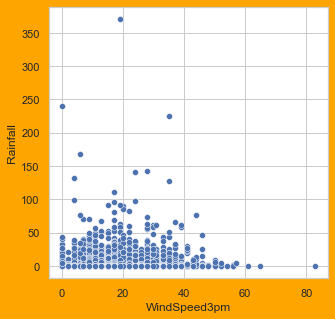

In [569]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="WindSpeed3pm",y="Rainfall",data=df)

Windspeed at 3PM is measured in km/hr and it ranges between 0 to 24km/hr and is right skewed and not normally distributed.
Also we see there is more rainfall when windspeed ie between 0 to 24Km.hr

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

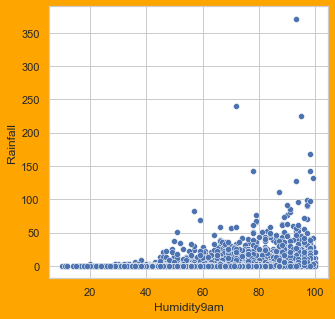

In [570]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Humidity9am",y="Rainfall",data=df)

If the humidity is more then there is chance of rainfall.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

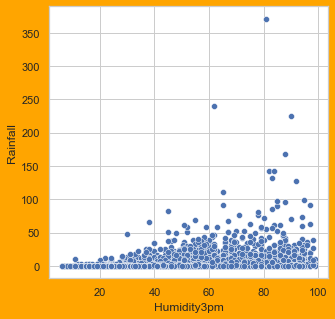

In [571]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Humidity3pm",y="Rainfall",data=df)

We see that if the percentage of Humidity increases at 3PM, then rainfall chances is more for tomorrow

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

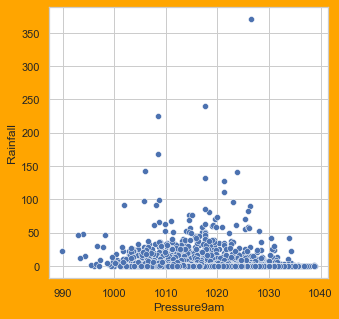

In [572]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Pressure9am",y="Rainfall",data=df)

When atmospheric pressure (hpa) reduced to mean sea level at 9am ranges between 1000 to 1020, the rainfall is from 0 to 40mm

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

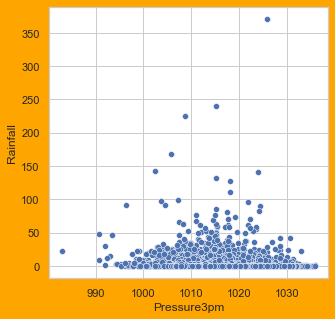

In [573]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Pressure3pm",y="Rainfall",data=df)

When atmospheric pressure (hpa) reduced to mean sea level at 3PM ranges between 1000 to 1020, the rainfall is from 0 to 40mm

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

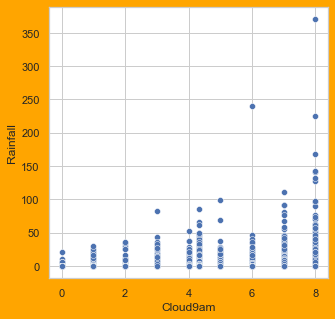

In [574]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Cloud9am",y="Rainfall",data=df)

When fraction of sky obscured by cloud at 9am increases, the rainfall increases a bit

<Figure size 360x360 with 0 Axes>

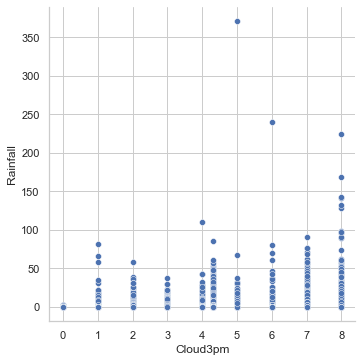

In [575]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.relplot(x="Cloud3pm",y="Rainfall",data=df)

When fraction of sky obscured by cloud at 3PM increases, the rainfall increases a bit

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

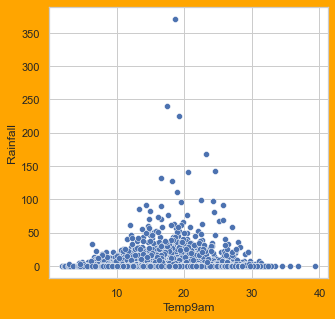

In [576]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Temp9am",y="Rainfall",data=df)

Chances of rainfall is more when Temperature (degrees C) at 9am is between 12 to 22 degree celsius

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

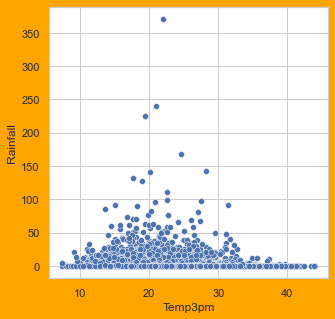

In [577]:
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="Temp3pm",y="Rainfall",data=df)

Chances of rainfall is more when Temperature (degrees C) at 3PM is between 12 to 26 degree celsius

<AxesSubplot:xlabel='RainToday', ylabel='count'>

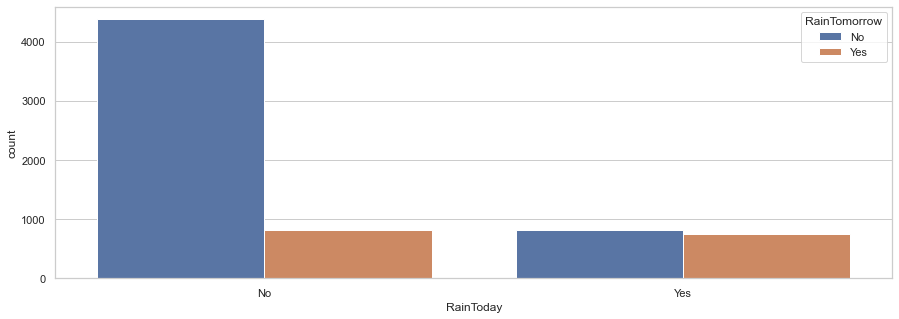

In [578]:
plt.figure(figsize=(15,5))
sns.countplot(x="RainToday",hue="RainTomorrow",data=df)

If it rains today, then probability to rain tomorrow is high also

In [579]:
# Lets convert the columns which are having data as Yes and No using Label encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:  # for 2 or fewer unique categories
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1       
print('%d columns were label encoded successfully' % le_count)

2 columns were label encoded successfully


In [581]:
df.sample(2)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DayOfRainfall,MonthOfRainfall,YearOfRainfall
6840,Adelaide,21.6,29.6,0.0,NNW,67.0,N,WSW,30.0,28.0,20.0,36.0,1009.4,1007.6,4.336806,4.320988,25.1,25.0,0,0,28,9,2014
6590,Brisbane,14.8,25.2,0.0,W,22.0,SW,W,6.0,9.0,68.0,39.0,1014.8,1011.8,1.000000,1.000000,20.6,24.4,0,0,5,5,2012


In [582]:
df.shape

(6762, 23)

In [583]:
df = pd.get_dummies(df)
df.shape

(6762, 79)

In [584]:
df.sample(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DayOfRainfall,MonthOfRainfall,YearOfRainfall,Location_Adelaide,Location_Albury,Location_Brisbane,Location_CoffsHarbour,Location_Darwin,Location_Melbourne,Location_Newcastle,Location_Penrith,Location_PerthAirport,Location_Uluru,Location_Williamtown,Location_Wollongong,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
8214,21.1,32.6,0.0,48.0,20.0,17.0,68.0,46.0,1012.3,1009.5,6.0,6.0,25.1,30.7,0,0,23,5,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7388,13.5,30.8,0.0,41.0,15.0,9.0,57.0,29.0,1021.1,1016.8,1.0,1.0,21.6,30.0,0,0,28,3,2012,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Boxplot

In [585]:
targetToPlot=df.loc[:, df.columns == 'RainTomorrow']
targetToPlot.head(2)

,RainTomorrow
0,0
1,0


In [586]:
dataToPlot=df.drop(columns= ['RainTomorrow'])
dataToPlot.head(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,DayOfRainfall,MonthOfRainfall,YearOfRainfall,Location_Adelaide,Location_Albury,Location_Brisbane,Location_CoffsHarbour,Location_Darwin,Location_Melbourne,Location_Newcastle,Location_Penrith,Location_PerthAirport,Location_Uluru,Location_Williamtown,Location_Wollongong,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,1,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,2,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


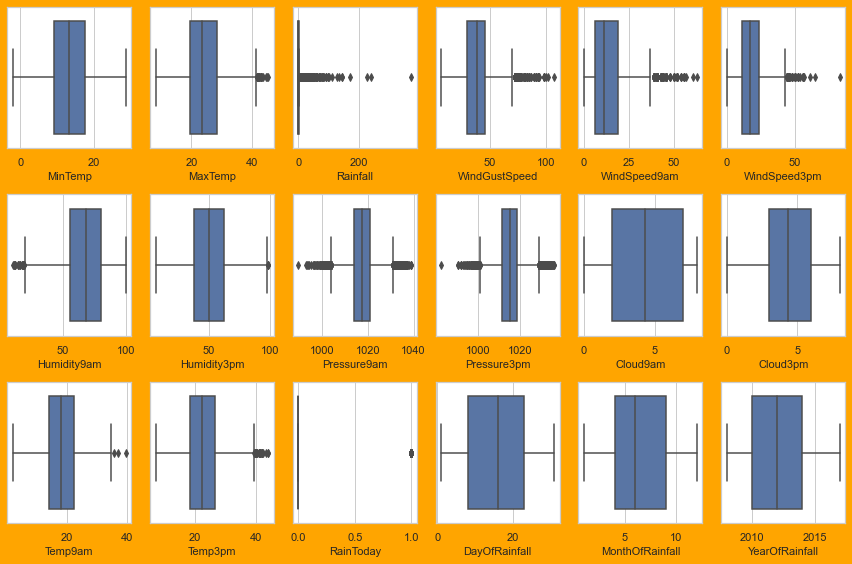

In [587]:
#Lets see data distribution now using Boxplot
# We willl plot just 15 columns as rest have been converted using One-Hot_Encoder technique and they will just have 0 and 1 values.
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=18:
        ax=plt.subplot(3,6,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see that outliers are there in our dataset and lets use zscore to find those outliers

In [588]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(6762, 79)
(306, 79)


We see that if we delete the data, then there will be Huge loss,so we will not delete any data.

# Skewness

In [589]:
features=df.drop(columns=['RainTomorrow'])
target=df[["RainTomorrow"]]

In [590]:
features.shape, target.shape

((6762, 78), (6762, 1))

In [591]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':features.skew()}) 
skew_df

,Skewness
MinTemp,-0.083706
MaxTemp,0.327598
Rainfall,13.650294
WindGustSpeed,0.780437
WindSpeed9am,0.957036
...,...
WindDir3pm_SSW,4.632903
WindDir3pm_SW,3.587805
WindDir3pm_W,3.743834
WindDir3pm_WNW,3.801379


In [592]:
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) ,"are skewed")

Out of 78 features 65 are skewed


# Log1P Transformation

In [593]:
for index in features.skew().index:
    if features.skew().loc[index]>0.5:
        features[index]=np.log1p(features[index])
    if features.skew().loc[index]<-0.5:
        features[index]=np.square(features[index])
print(features.skew())
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) 
      ,"are little skewed and we have improved the skewness to much extent")

MinTemp          -0.083706
MaxTemp           0.327598
Rainfall          1.865886
WindGustSpeed    -0.422156
WindSpeed9am      0.043051
                    ...   
WindDir3pm_SSW         inf
WindDir3pm_SW          inf
WindDir3pm_W           inf
WindDir3pm_WNW         inf
WindDir3pm_WSW         inf
Length: 78, dtype: float64
Out of 78 features 62 are little skewed and we have improved the skewness to much extent


# Standard Scaler

In [594]:
x= df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [595]:
x.shape,y.shape

((6762, 78), (6762,))

In [596]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,DayOfRainfall,MonthOfRainfall,YearOfRainfall,Location_Adelaide,Location_Albury,Location_Brisbane,Location_CoffsHarbour,Location_Darwin,Location_Melbourne,Location_Newcastle,Location_Penrith,Location_PerthAirport,Location_Uluru,Location_Williamtown,Location_Wollongong,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.052498,-0.195499,-0.207990,0.375489,0.737499,0.673324,0.203327,-1.539016,-1.646846,-1.344002,1.480398,0.000000,-0.173897,-0.152152,-0.550355,-1.675969,1.639768,-1.761148,-0.176817,2.540738,-0.306013,-0.315172,-0.195935,-0.369161,-0.372,-0.277041,-0.46543,-0.076164,-0.316305,-0.190583,-0.524755,-0.236088,-0.202752,-0.269856,-0.215465,-0.210533,-0.167248,-0.213958,-0.24265,-0.240593,-0.247397,-0.215089,-0.271744,3.818461,-0.250079,-0.257343,-0.22938,-0.249745,-0.187224,-0.511666,-0.238522,-0.229023,-0.181651,-0.271116,-0.224335,-0.263494,-0.215465,-0.239904,-0.309181,4.649235,-0.215841,-0.248741,-0.248069,-0.23293,-0.238176,-0.235039,-0.276421,-0.217337,-0.193069,-0.250746,-0.28043,-0.40948,-0.257669,-0.206674,-0.259946,-0.250412,4.047596,-0.282266
1,-1.030484,0.163411,-0.265231,0.375489,-0.897347,0.463855,-1.368138,-1.376828,-1.165715,-1.226694,0.000000,0.000000,-0.121468,0.266510,-0.550355,-1.562245,1.639768,-1.761148,-0.176817,2.540738,-0.306013,-0.315172,-0.195935,-0.369161,-0.372,-0.277041,-0.46543,-0.076164,-0.316305,-0.190583,-0.524755,-0.236088,-0.202752,-0.269856,-0.215465,-0.210533,-0.167248,-0.213958,-0.24265,-0.240593,-0.247397,-0.215089,-0.271744,-0.261886,3.998744,-0.257343,-0.22938,-0.249745,-0.187224,-0.511666,-0.238522,-0.229023,5.505048,-0.271116,-0.224335,-0.263494,-0.215465,-0.239904,-0.309181,-0.215089,-0.215841,-0.248741,-0.248069,-0.23293,-0.238176,-0.235039,-0.276421,-0.217337,-0.193069,-0.250746,-0.28043,-0.40948,-0.257669,-0.206674,-0.259946,-0.250412,-0.247060,3.542753
2,-0.037750,0.261296,-0.265231,0.525016,0.635321,0.882794,-1.717352,-1.106513,-1.663437,-1.075869,0.000000,-0.999089,0.542637,0.082299,-0.550355,-1.448521,1.639768,-1.761148,-0.176817,2.540738,-0.306013,-0.315172,-0.195935,-0.369161,-0.372,-0.277041,-0.46543,-0.076164,-0.316305,-0.190583,-0.524755,-0.236088,-0.202752,-0.269856,-0.215465,-0.210533,-0.167248,-0.213958,-0.24265,-0.240593,-0.247397,-0.215089,-0.271744,-0.261886,-0.250079,3.885872,-0.22938,-0.249745,-0.187224,-0.511666,-0.238522,-0.229023,-0.181651,-0.271116,-0.224335,-0.263494,-0.215465,-0.239904,-0.309181,4.649235,-0.215841,-0.248741,-0.248069,-0.23293,-0.238176,-0.235039,-0.276421,-0.217337,-0.193069,-0.250746,-0.28043,-0.40948,-0.257669,-0.206674,-0.259946,-0.250412,-0.247060,3.542753
3,-0.705589,0.636520,-0.265231,-1.119786,-0.182102,-0.897697,-1.309935,-1.863394,-0.004365,-0.388779,0.000000,0.000000,0.035820,0.634933,-0.550355,-1.334798,1.639768,-1.761148,-0.176817,2.540738,-0.306013,-0.315172,-0.195935,-0.369161,-0.372,-0.277041,-0.46543,-0.076164,-0.316305,-0.190583,-0.524755,-0.236088,-0.202752,-0.269856,4.641121,-0.210533,-0.167248,-0.213958,-0.24265,-0.240593,-0.247397,-0.215089,-0.271744,-0.261886,-0.250079,-0.257343,-0.22938,-0.249745,-0.187224,-0.511666,-0.238522,-0.229023,-0.181651,-0.271116,-0.224335,3.795153,-0.215465,-0.239904,-0.309181,-0.215089,-0.

# PCA

In [597]:
from sklearn.decomposition import PCA
pca=PCA()
test=pca.fit(x)

In [598]:
test.explained_variance_ratio_

array([6.76571081e-02, 4.51073545e-02, 3.91711601e-02, 3.42877482e-02,
       2.96140851e-02, 2.85690999e-02, 2.60194644e-02, 2.35899056e-02,
       2.17670994e-02, 2.13915170e-02, 1.93077646e-02, 1.85172058e-02,
       1.74427394e-02, 1.68866095e-02, 1.59079786e-02, 1.56322069e-02,
       1.54770683e-02, 1.52342162e-02, 1.49727676e-02, 1.48361100e-02,
       1.47677986e-02, 1.45521281e-02, 1.43908348e-02, 1.42891337e-02,
       1.39431296e-02, 1.38502914e-02, 1.36926791e-02, 1.35753694e-02,
       1.34337375e-02, 1.33146376e-02, 1.32138367e-02, 1.30553924e-02,
       1.28737259e-02, 1.27781087e-02, 1.26796589e-02, 1.25125164e-02,
       1.24906595e-02, 1.23474809e-02, 1.21669473e-02, 1.20516811e-02,
       1.20179401e-02, 1.18935224e-02, 1.16883354e-02, 1.15401012e-02,
       1.12190628e-02, 1.09113862e-02, 1.07870370e-02, 1.03234929e-02,
       1.02290001e-02, 9.85460783e-03, 9.77379504e-03, 9.51557586e-03,
       9.21249900e-03, 8.80852844e-03, 8.24399988e-03, 7.90773484e-03,
      

In [599]:
var_cumsum=np.cumsum(test.explained_variance_ratio_)*100
var_cumsum

array([  6.76571081,  11.27644626,  15.19356228,  18.6223371 ,
        21.5837456 ,  24.4406556 ,  27.04260203,  29.40159259,
        31.57830253,  33.71745423,  35.64823069,  37.49995127,
        39.24422521,  40.93288616,  42.52368402,  44.08690472,
        45.63461154,  47.15803317,  48.65530993,  50.13892093,
        51.6157008 ,  53.0709136 ,  54.50999709,  55.93891045,
        57.33322341,  58.71825255,  60.08752046,  61.4450574 ,
        62.78843116,  64.11989492,  65.44127859,  66.74681783,
        68.03419042,  69.3120013 ,  70.57996719,  71.83121883,
        73.08028479,  74.31503287,  75.5317276 ,  76.73689571,
        77.93868972,  79.12804196,  80.2968755 ,  81.45088562,
        82.5727919 ,  83.66393052,  84.74263422,  85.77498351,
        86.79788352,  87.7833443 ,  88.76072381,  89.71228139,
        90.63353129,  91.51438414,  92.33878412,  93.12955761,
        93.8636271 ,  94.57278684,  95.24454375,  95.84468583,
        96.41399546,  96.9470651 ,  97.4529288 ,  97.92

In [600]:
components=np.argmax(var_cumsum>90)
print('Number of components explaning 90% variance are :',components)

Number of components explaning 90% variance are : 52


Text(0, 0.5, 'Comulative explaind variance')

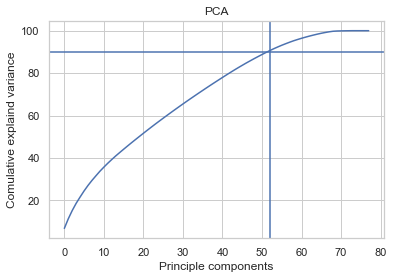

In [601]:
plt.axvline(x=components)
plt.axhline(y=90)
plt.plot(var_cumsum)
plt.title("PCA")
plt.xlabel('Principle components')
plt.ylabel('Comulative explaind variance')

From the graph, we see 90% of the principal components are explained by 52 columns

In [602]:
final_pca=PCA(n_components=52)
final=final_pca.fit_transform(x)

In [603]:
x_final=pd.DataFrame(final)
x=x_final
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.269255,2.795160,-0.313541,-1.224084,-3.714566,-1.774315,1.279341,-2.630702,0.014559,1.843975,-1.162613,0.500110,-0.161732,-1.158862,0.282433,0.403287,0.610367,0.436222,-0.972747,-0.694347,0.012681,-0.199985,-1.418583,0.265302,0.692225,-1.793176,0.845441,-0.828070,-0.821901,-0.194412,0.065120,-0.055405,0.223420,1.748492,0.478055,0.254558,2.516098,1.318697,1.080576,1.426372,0.550515,-0.824991,0.900864,-0.505553,1.579298,0.219620,-0.175525,-1.444881,-0.377755,-0.949196,1.145745,-0.261769
1,0.816504,1.737005,-1.314440,-1.481533,-3.148985,-1.462238,0.670589,-0.765602,-1.042908,1.470652,0.389705,-0.233561,-0.587244,-0.220476,-0.967205,-0.584665,0.707068,2.140163,0.348444,-0.150788,-2.125961,0.659838,1.353192,-0.880617,0.943710,-1.995585,1.364773,-0.141863,0.062835,-0.289303,-1.072629,-0.887300,0.392061,0.719378,1.735773,1.022720,-1.224363,-2.573659,-1.475176,-2.132015,0.665698,1.540770,1.322944,0.389503,-0.640567,-0.339863,0.648607,-0.847803,-0.991986,0.087809,0.529864,2.381520
2,1.582135,2.539460,-1.613039,-0.966003,-2.111215,-0.907050,2.930327,-2.159720,-0.496578,0.306635,0.213983,1.114196,-1.498070,1.076133,0.030427,-0.603359,0.448062,1.391062,0.485634,0.724278,-1.529821,0.437345,0.051044,-2.382071,0.109780,-0.879647,0.303601,-2.744991,-2.217969,0.093446,0.946787,1.503221,0.340643,0.772704,0.021195,-0.294504,0.551963,-0.630021,0.582411,1.220691,0.475867,0.064309,-0.364345,-0.146018,1.405123,0.809287,0.176344,-0.753422,-1.205576,-0.129940,0.478677,1.489635
3,1.012193,-0.785175,-2.314907,1.316300,-2.179069,0.193928,-0.257240,-1.085570,1.649875,2.161644,0.516122,-0.660092,-0.429319,0.242280,-0.372865,0.646135,1.733645,1.572415,0.279070,-0.225305,-1.359454,-0.085280,-1.959204,-0.344913,0.205495,-1.716663,-0.048270,-0.330664,2.693699,0.515120,0.816253,0.334264,0.024307,-0.198278,-0.303633,-0.488438,-1.516309,-1.174997,2.311162,-0.815909,-1.437619,-0.429656,-0.680128,-1.311168,2.075754,0.682532,1.263553,0.471169,-1.263676,-0.024281,0.121962,0.489193
4,1.449504,0.879950,0.399474,-0.492600,-3.394035,-0.678722,0.853284,-1.462528,0.783878,0.658317,-1.212533,-1.396787,1.366059,-0.019645,1.287504,0.158544,-1.642708,1.130597,-0.576221,0.363666,0.198174,-0.526128,-1.819194,-0.883101,0.279564,-0.863152,-0.885263,0.795785,-0.230659,0.093868,-0.688077,-0.368471,-1.002877,-1.307108,-0.385059,2.599248,0.244544,-1.521572,1.092741,-0.307827,-1.023314,-0.638310,1.523599,-0.850968,0.900560,-0.583614,-1.262193,-1.956820,-0.471784,-1.155332,1.379382,0.512854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,-0.796572,-2.976012,-2.466349,-1.065598,1.760149,-1.195329,-2.264805,-1.009722,3.042969,-0.264848,1.143108,0.838287,0.330735,-1.166565,1.901220,1.289145,3.808792,4.055111,-4.311279,-2.415572,-0.851162,-2.253162,-0.157479,-2.224576,-1.556555,0.786010,0.121664,-0.585350,2.465577,1.812059,3.286630,-0.737455,3.921324,-1.058726,-0.822472,0.555319,0.878253,2.835749,-0.383854,0.253123,-1.798531,2.883883,0.260106,1.051694,-3.618403,3.368117,-1.938235,2.173990,-0.611172,-0.724614,-0.541472,1.728459
6758,-0.703479,-1.664603,-2.556201,-1.263466,0.061129,-0.014849,-4.276481,-1.612944,2.031129,-1.347441,3.247326,0.319627,0.122408,-0.571810,1.915363,1.484273,5.439110,2.011535,-4.670630,-1.498866,-0.889515,-3.420221,1.688687,-2.130720,0.359131,2.938919,0.180679,-1.586064,3.067441,0.729264,3.601625,-1.116846,3.576368,-1.957310,-0.492711,1.179486,2.308330,2.007149,-0.546408,-0.415422,-3.202385,0.101812,0.750402,1.944614,-0.890039,1.765537,-1.782128,1.690945,1.769040,-0.185689,-2.300159,3.897548
6759,-0.074580,-1.200849,-2.061638,-1.799994,0.208443,-0.943815,-3.892592,-1.810618,1.690389,-0.425199,1.943813,1.323792,-0.451553,-1.921337,1.155964,0.820063,4.981

# Model Building

In [604]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [605]:
#Define a function to get the best auc_roc score and use the same function everywhere

def get_aucroc_score(model,x,y):
    max_aucroc_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=i,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        aucroc=roc_auc_score(y_test,pred_test)
        print("At",i," aucroc score is ",aucroc)
        if aucroc>max_aucroc_score:
            max_aucroc_score=aucroc
            final_i=i
    print("At",final_i,"max roc auc score is :",max_aucroc_score)
    return final_i

# Logistic Regression

In [606]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [607]:
get_aucroc_score(lgr,x,y)

At 40  aucroc score is  0.7641847875951923
At 41  aucroc score is  0.7676117074961005
At 42  aucroc score is  0.738361317552069
At 43  aucroc score is  0.7376823561794661
At 44  aucroc score is  0.7602119460500962
At 45  aucroc score is  0.7601568951279934
At 46  aucroc score is  0.7531837783282871
At 47  aucroc score is  0.721557023580145
At 48  aucroc score is  0.7487063033305809
At 49  aucroc score is  0.7614597669510965
At 50  aucroc score is  0.7535553720524819
At 51  aucroc score is  0.7454215983117718
At 52  aucroc score is  0.762423158087898
At 53  aucroc score is  0.7442288283328746
At 54  aucroc score is  0.758087897972291
At 55  aucroc score is  0.7592806679511882
At 56  aucroc score is  0.7555372052481879
At 57  aucroc score is  0.7509725662904854
At 58  aucroc score is  0.7483117717221763
At 59  aucroc score is  0.7576933663638866
At 60  aucroc score is  0.7644692173593907
At 61  aucroc score is  0.7605284888521883
At 62  aucroc score is  0.7296036333608588
At 63  aucroc s

89

In [608]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=89,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lgr.fit(x_train,y_train)
pred_train=lgr.predict(x_train)
pred_test=lgr.predict(x_test)
rocauc_scoreLR=roc_auc_score(y_test,pred_test)
rocauc_scoreLR

0.7829479768786127

In [614]:
clfLR_cvScore=cross_val_score(lgr,x,y,cv=7,scoring='roc_auc').mean()
clfLR_cvScore

0.7455228632858059

In [615]:
from sklearn.metrics import classification_report, confusion_matrix

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1038
           1       0.51      0.80      0.62       315

    accuracy                           0.77      1353
   macro avg       0.72      0.78      0.73      1353
weighted avg       0.83      0.77      0.79      1353

Confusion Matrix
 [[795 243]
 [ 63 252]]


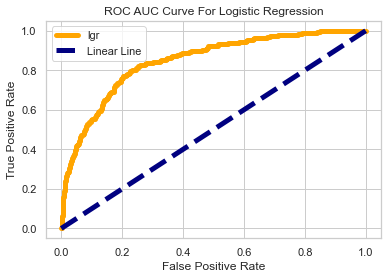

In [616]:
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='lgr',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Logistic Regression")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [617]:
clfLR_data = {'Model': ['Logistic Regression'],            
             'ROC_AUC Score': rocauc_scoreLR,
             'CV Score': clfLR_cvScore
            }

clf_LR_df = pd.DataFrame(clfLR_data)  
clf_LR_df

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.782948,0.745523


# KNeighborsClassifier

In [618]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()

In [619]:
get_aucroc_score(knn,x,y)

At 40  aucroc score is  0.6838654922469951
At 41  aucroc score is  0.6984035232590147
At 42  aucroc score is  0.6957106156528121
At 43  aucroc score is  0.6694926140012846
At 44  aucroc score is  0.6936416184971098
At 45  aucroc score is  0.6841178089733003
At 46  aucroc score is  0.6749334801357921
At 47  aucroc score is  0.6777456647398843
At 48  aucroc score is  0.646710707404349
At 49  aucroc score is  0.6708826497843838
At 50  aucroc score is  0.6757317185062849
At 51  aucroc score is  0.6543627855766583
At 52  aucroc score is  0.6725571153316817
At 53  aucroc score is  0.6889118267730985
At 54  aucroc score is  0.6668868703550784
At 55  aucroc score is  0.6719332048811817
At 56  aucroc score is  0.6844894026974953
At 57  aucroc score is  0.6734975685842738
At 58  aucroc score is  0.6689008165886778
At 59  aucroc score is  0.68298926507019
At 60  aucroc score is  0.6868978805394991
At 61  aucroc score is  0.6852004771079916
At 62  aucroc score is  0.6681346912560784
At 63  aucroc 

66

In [622]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=66,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
rocauc_scoreKNN=roc_auc_score(y_test,pred_test)
rocauc_scoreKNN

0.6883750802825948

In [623]:
clfKNN_cvScore=cross_val_score(knn,x,y,cv=5,scoring='roc_auc').mean()
clfKNN_cvScore

0.6324692383979597

In [624]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      1038
           1       0.40      0.69      0.51       315

    accuracy                           0.69      1353
   macro avg       0.64      0.69      0.64      1353
weighted avg       0.77      0.69      0.71      1353

Confusion Matrix
 [[714 324]
 [ 98 217]]


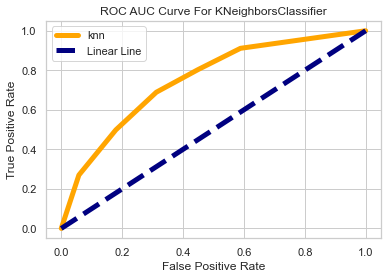

In [625]:
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,knn.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='knn',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For KNeighborsClassifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [626]:
clfKNN_data = {'Model': ['KNeighborsClassifier'],            
             'ROC_AUC Score': rocauc_scoreKNN,
             'CV Score': clfKNN_cvScore
            }

clf_KNN_df = pd.DataFrame(clfKNN_data)  
clf_KNN_df

,Model,ROC_AUC Score,CV Score
0,KNeighborsClassifier,0.688375,0.632469


# Decision Tree Classifier

In [627]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [628]:
grid_Search=GridSearchCV(estimator=decTree,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [629]:
decTree=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=10,min_samples_split=10)
get_aucroc_score(decTree,x,y)

At 40  aucroc score is  0.6982062574548122
At 41  aucroc score is  0.6892421323057161
At 42  aucroc score is  0.6885952839710064
At 43  aucroc score is  0.6607578676942839
At 44  aucroc score is  0.7065051839618313
At 45  aucroc score is  0.6641480869804568
At 46  aucroc score is  0.7046334526103312
At 47  aucroc score is  0.6951738691623085
At 48  aucroc score is  0.6911459766951096
At 49  aucroc score is  0.6775713368198917
At 50  aucroc score is  0.7005826222589228
At 51  aucroc score is  0.699421965317919
At 52  aucroc score is  0.6830122029543995
At 53  aucroc score is  0.695196807046518
At 54  aucroc score is  0.6663730617487843
At 55  aucroc score is  0.6888154876594182
At 56  aucroc score is  0.7166207908982476
At 57  aucroc score is  0.6791265253693
At 58  aucroc score is  0.6892513074594
At 59  aucroc score is  0.7002981924947242
At 60  aucroc score is  0.6937287824571061
At 61  aucroc score is  0.6775483989356822
At 62  aucroc score is  0.683975594091201
At 63  aucroc score 

74

In [631]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=74,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
decTree.fit(x_train,y_train)
pred_train=decTree.predict(x_train)
pred_test=decTree.predict(x_test)
rocauc_scoreTree=roc_auc_score(y_test,pred_test)
rocauc_scoreTree

0.7076979539407285

In [632]:
clfTree_cvScore=cross_val_score(decTree,x,y,cv=5,scoring='roc_auc').mean()
clfTree_cvScore

0.6388160818041897

In [633]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1038
           1       0.44      0.68      0.53       315

    accuracy                           0.72      1353
   macro avg       0.66      0.71      0.67      1353
weighted avg       0.78      0.72      0.74      1353

Confusion Matrix
 [[764 274]
 [101 214]]


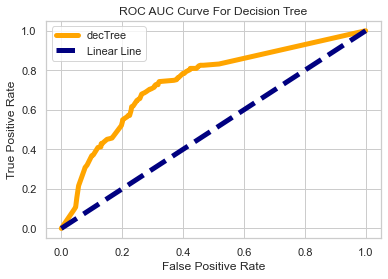

In [634]:
fpr, tpr, thresholds = roc_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,decTree.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='decTree',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Decision Tree")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [635]:
clfTree_data = {'Model': ['Decison Tree Classifier'],            
             'ROC_AUC Score': rocauc_scoreTree,
             'CV Score': clfTree_cvScore
            }

clf_Tree_df = pd.DataFrame(clfTree_data)  
clf_Tree_df

,Model,ROC_AUC Score,CV Score
0,Decison Tree Classifier,0.707698,0.638816


# Naive Byes Classifier

In [636]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
get_aucroc_score(nb,x,y)

At 40  aucroc score is  0.7220708321864392
At 41  aucroc score is  0.6901504725204148
At 42  aucroc score is  0.7037021745114231
At 43  aucroc score is  0.7186897880539498
At 44  aucroc score is  0.7137306174878428
At 45  aucroc score is  0.7269428387925498
At 46  aucroc score is  0.6986558399853197
At 47  aucroc score is  0.6774841728598954
At 48  aucroc score is  0.6880264244426094
At 49  aucroc score is  0.7072713092944307
At 50  aucroc score is  0.6876318928342049
At 51  aucroc score is  0.6772318561335903
At 52  aucroc score is  0.6777364895862006
At 53  aucroc score is  0.6785026149187999
At 54  aucroc score is  0.7170795485824387
At 55  aucroc score is  0.7277319020093587
At 56  aucroc score is  0.7066473988439306
At 57  aucroc score is  0.6725800532158914
At 58  aucroc score is  0.6772318561335903
At 59  aucroc score is  0.7026516194146251
At 60  aucroc score is  0.6966740067896137
At 61  aucroc score is  0.6891320304615102
At 62  aucroc score is  0.6900954215983117
At 63  aucr

64

In [637]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=64,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
nb.fit(x_train,y_train)
pred_train=nb.predict(x_train)
pred_test=nb.predict(x_test)
rocauc_scoreNB=roc_auc_score(y_test,pred_test)
rocauc_scoreNB

0.7322093770070649

In [640]:
clfNB_cvScore=cross_val_score(nb,x,y,cv=5,scoring='roc_auc').mean()
clfNB_cvScore

0.7417184653766518

In [641]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1038
           1       0.48      0.69      0.57       315

    accuracy                           0.76      1353
   macro avg       0.69      0.73      0.70      1353
weighted avg       0.80      0.76      0.77      1353

Confusion Matrix
 [[805 233]
 [ 98 217]]


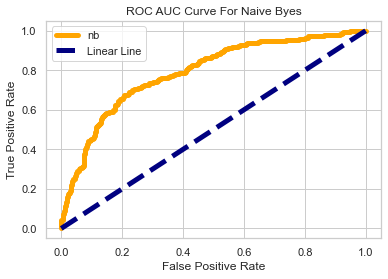

In [642]:
fpr, tpr, thresholds = roc_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,nb.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='nb',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Naive Byes")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [643]:
clfNB_data = {'Model': ['Gaussian NB'],            
             'ROC_AUC Score': rocauc_scoreNB,
             'CV Score': clfNB_cvScore
            }

clf_NB_df = pd.DataFrame(clfNB_data)  
clf_NB_df

,Model,ROC_AUC Score,CV Score
0,Gaussian NB,0.732209,0.741718


# Random Forest Classifier

In [644]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [645]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}


In [139]:
forest=RandomForestClassifier(criterion='entropy', max_depth= 15, min_samples_leaf= 5,min_samples_split=10, n_estimators=150)

In [440]:
get_aucroc_score(forest,x,y)

At 40  aucroc score is  0.7703734287549315
At 41  aucroc score is  0.7698917331865309
At 42  aucroc score is  0.7382328654004955
At 43  aucroc score is  0.757619965134416
At 44  aucroc score is  0.7537893384714194
At 45  aucroc score is  0.7785622534177447
At 46  aucroc score is  0.7597440132122213
At 47  aucroc score is  0.7556381319387099
At 48  aucroc score is  0.7736030828516377
At 49  aucroc score is  0.7592623176438205
At 50  aucroc score is  0.7638820075236259
At 51  aucroc score is  0.7521790989999082
At 52  aucroc score is  0.7511835948252132
At 53  aucroc score is  0.758922836957519
At 54  aucroc score is  0.7628314524268281
At 55  aucroc score is  0.7723002110285346
At 56  aucroc score is  0.772497476832737
At 57  aucroc score is  0.7540737682356179
At 58  aucroc score is  0.7579594458207175
At 59  aucroc score is  0.7732085512432333
At 60  aucroc score is  0.7794155427103404
At 61  aucroc score is  0.7590650518396183
At 62  aucroc score is  0.744779337553904
At 63  aucroc s

66

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=66,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
forest.fit(x_train,y_train)
pred_test=forest.predict(x_test)
rocauc_scoreForest=roc_auc_score(y_test,pred_test)
rocauc_scoreForest

0.7922011193687495

In [143]:
clfForest_cvScore=cross_val_score(forest,x,y,cv=6,scoring='roc_auc').mean()
clfForest_cvScore

0.7815212755004487

In [144]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1038
           1       0.61      0.73      0.66       315

    accuracy                           0.83      1353
   macro avg       0.76      0.79      0.77      1353
weighted avg       0.84      0.83      0.83      1353

Confusion Matrix
 [[890 148]
 [ 86 229]]


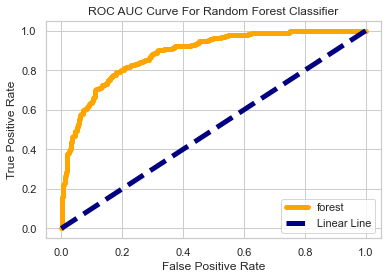

In [145]:
fpr, tpr, thresholds = roc_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,forest.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='forest',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Random Forest Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [146]:
clfForest_data = {'Model': ['RandomForestClassifier'],            
             'ROC_AUC Score': rocauc_scoreForest,
             'CV Score': clfForest_cvScore
            }

clf_Forest_df = pd.DataFrame(clfForest_data)  
clf_Forest_df

,Model,ROC_AUC Score,CV Score
0,RandomForestClassifier,0.792201,0.781521


# Gradient Boost Classifier

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier()

In [149]:
params={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[100,150,200]
           }
params

{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100, 150, 200]}

In [150]:
clf = GridSearchCV(gb_clf, params, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [151]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
get_aucroc_score(gb_clf,x,y)

At 40  aucroc score is  0.7580557849343977
At 41  aucroc score is  0.7427516285897788
At 42  aucroc score is  0.7361179924763739
At 43  aucroc score is  0.7356041838700798
At 44  aucroc score is  0.7499449490778972
At 45  aucroc score is  0.7775529865125241
At 46  aucroc score is  0.7508532892925956
At 47  aucroc score is  0.7511698320946877
At 48  aucroc score is  0.7525828057619965
At 49  aucroc score is  0.7492109367831912
At 50  aucroc score is  0.7435406918065877
At 51  aucroc score is  0.7536654738966877
At 52  aucroc score is  0.7623038810900084
At 53  aucroc score is  0.7422928709055876
At 54  aucroc score is  0.762840627580512
At 55  aucroc score is  0.7579135700522984
At 56  aucroc score is  0.7610560601890082
At 57  aucroc score is  0.7420956051013856
At 58  aucroc score is  0.7389531149646756
At 59  aucroc score is  0.7736443710432149
At 60  aucroc score is  0.7751445086705203
At 61  aucroc score is  0.7428938434718781
At 62  aucroc score is  0.7466602440590879
At 63  aucro

66

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=66,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
gb_clf.fit(x_train,y_train)
pred_train=gb_clf.predict(x_train)
pred_test=gb_clf.predict(x_test)
rocauc_scoreGBC=roc_auc_score(y_test,pred_test)
rocauc_scoreGBC

0.7781539590788146

In [154]:
clfGBC_cvScore=cross_val_score(gb_clf,x,y,cv=5,scoring='roc_auc').mean()
clfGBC_cvScore

0.8105358299491432

In [155]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1038
           1       0.52      0.77      0.62       315

    accuracy                           0.78      1353
   macro avg       0.72      0.78      0.74      1353
weighted avg       0.83      0.78      0.80      1353

Confusion Matrix
 [[818 220]
 [ 73 242]]


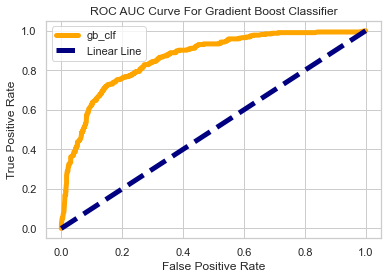

In [156]:
fpr, tpr, thresholds = roc_curve(y_test,gb_clf.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,gb_clf.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='gb_clf',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Gradient Boost Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [157]:
clfGBC_data = {'Model': ['Gradient Boost Classifier'],            
             'ROC_AUC Score': rocauc_scoreGBC,
             'CV Score': clfGBC_cvScore
            }

clf_GBC_df = pd.DataFrame(clfGBC_data)  
clf_GBC_df

,Model,ROC_AUC Score,CV Score
0,Gradient Boost Classifier,0.778154,0.810536


# AdaBoost Classifier

In [160]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier()

In [161]:
params={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[100,150,200]
           }
params

{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100, 150, 200]}

In [162]:
clf = GridSearchCV(ada_clf, params, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [163]:
ada_clf=AdaBoostClassifier(learning_rate=0.01,n_estimators=200)
get_aucroc_score(ada_clf,x,y)

At 40  aucroc score is  0.7439122855307827
At 41  aucroc score is  0.739040278924672
At 42  aucroc score is  0.7202770896412514
At 43  aucroc score is  0.7347279566932745
At 44  aucroc score is  0.746036333608588
At 45  aucroc score is  0.7628727406184055
At 46  aucroc score is  0.7319799981649692
At 47  aucroc score is  0.7234516928158546
At 48  aucroc score is  0.7567529131112947
At 49  aucroc score is  0.7390081658867786
At 50  aucroc score is  0.7314432516744656
At 51  aucroc score is  0.7447105239012753
At 52  aucroc score is  0.7528993485640885
At 53  aucroc score is  0.7261675383062666
At 54  aucroc score is  0.7496605193136985
At 55  aucroc score is  0.7445361959812826
At 56  aucroc score is  0.7571474447196991
At 57  aucroc score is  0.7376181301036792
At 58  aucroc score is  0.723901275346362
At 59  aucroc score is  0.7597853014037986
At 60  aucroc score is  0.7564134324249931
At 61  aucroc score is  0.7452472703917791
At 62  aucroc score is  0.7459262317643821
At 63  aucroc 

89

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=89,test_size=0.20,stratify=target)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
ada_clf.fit(x_train,y_train)
pred_train=ada_clf.predict(x_train)
pred_test=ada_clf.predict(x_test)
rocauc_scoreADA=roc_auc_score(y_test,pred_test)
rocauc_scoreADA

0.7810991834113221

In [165]:
clfADA_cvScore=cross_val_score(ada_clf,x,y,cv=5,scoring='roc_auc').mean()
clfADA_cvScore

0.8273923443764393

In [166]:
# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1038
           1       0.54      0.76      0.63       315

    accuracy                           0.79      1353
   macro avg       0.73      0.78      0.74      1353
weighted avg       0.83      0.79      0.80      1353

Confusion Matrix
 [[834 204]
 [ 76 239]]


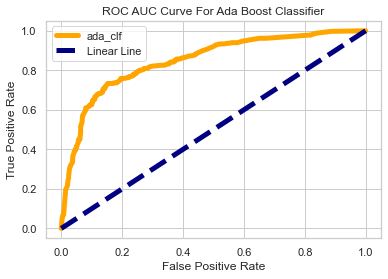

In [167]:
fpr, tpr, thresholds = roc_curve(y_test,ada_clf.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,ada_clf.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='ada_clf',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Ada Boost Classifier")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

In [168]:
clfADA_data = {'Model': ['Ada Boost Classifier'],            
             'ROC_AUC Score': rocauc_scoreADA,
             'CV Score': clfADA_cvScore
            }

clf_ADA_df = pd.DataFrame(clfADA_data)  
clf_ADA_df

,Model,ROC_AUC Score,CV Score
0,Ada Boost Classifier,0.781099,0.827392


In [169]:
modelDF=pd.concat([clf_LR_df,clf_KNN_df,clf_Tree_df,clf_NB_df,clf_Forest_df,clf_ADA_df,clf_GBC_df]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,ROC_AUC Score,CV Score
0,Logistic Regression,0.803487,0.756907
1,KNeighborsClassifier,0.714277,0.634806
2,Decison Tree Classifier,0.765478,0.709502
3,Gaussian NB,0.629425,0.554204
4,RandomForestClassifier,0.792201,0.781521
5,Ada Boost Classifier,0.781099,0.827392
6,Gradient Boost Classifier,0.778154,0.810536


# Plottting combined ROC AUC Curve

In [170]:
roc_auc_dict = {} #ROC AUC dict for TPR and FPR values
precision_recall_dict = {} #precision recall dictionary

def modify_roc_auc_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for ROC AUC metrics
    fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    clf_roc_auc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    modify_dictionary[name] = clf_roc_auc_dict
    
def modify_precision_recall_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for precision recall metrics
    precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    precision_recall_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    modify_dictionary[name] = precision_recall_dict

In [171]:
def fit_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)
    class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    class_report['clf'] = name 
    return class_report

In [172]:
lgr_report = fit_clf(lgr, x_train, y_train, x_test, y_test, name='Logistic Regression')
lgr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.919653,0.557870,0.804139,0.738761,0.835424,Logistic Regression
recall,0.815992,0.765079,0.804139,0.790536,0.804139,Logistic Regression
f1-score,0.864727,0.645248,0.804139,0.754987,0.813629,Logistic Regression
support,1038.000000,315.000000,0.804139,1353.000000,1353.000000,Logistic Regression


In [173]:
knn_report = fit_clf(knn, x_train, y_train, x_test, y_test, name='KNeighborsClassifier')
knn_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.868516,0.393130,0.684405,0.630823,0.757839,KNeighborsClassifier
recall,0.693642,0.653968,0.684405,0.673805,0.684405,KNeighborsClassifier
f1-score,0.771291,0.491061,0.684405,0.631176,0.706049,KNeighborsClassifier
support,1038.000000,315.000000,0.684405,1353.000000,1353.000000,KNeighborsClassifier


In [174]:
tree_report = fit_clf(decTree, x_train, y_train, x_test, y_test, name='DecisionTreeClassifier')
tree_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.893750,0.541985,0.791574,0.717867,0.811853,DecisionTreeClassifier
recall,0.826590,0.676190,0.791574,0.751390,0.791574,DecisionTreeClassifier
f1-score,0.858859,0.601695,0.791574,0.730277,0.798987,DecisionTreeClassifier
support,1038.000000,315.000000,0.791574,1353.000000,1353.000000,DecisionTreeClassifier


In [175]:
naiveByes_report = fit_clf(nb, x_train, y_train, x_test, y_test, name='NaiveByesClassifier')
naiveByes_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.890365,0.268061,0.406504,0.579213,0.745483,NaiveByesClassifier
recall,0.258189,0.895238,0.406504,0.576713,0.406504,NaiveByesClassifier
f1-score,0.400299,0.412582,0.406504,0.406441,0.403159,NaiveByesClassifier
support,1038.000000,315.000000,0.406504,1353.000000,1353.000000,NaiveByesClassifier


In [176]:
forest_report = fit_clf(forest, x_train, y_train, x_test, y_test, name='RandomForestClassifier')
forest_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.900198,0.627566,0.831486,0.763882,0.836725,RandomForestClassifier
recall,0.877649,0.679365,0.831486,0.778507,0.831486,RandomForestClassifier
f1-score,0.888780,0.652439,0.831486,0.770610,0.833756,RandomForestClassifier
support,1038.000000,315.000000,0.831486,1353.000000,1353.000000,RandomForestClassifier


In [177]:
gradient_report = fit_clf(gb_clf, x_train, y_train, x_test, y_test, name='GradientBoostClassifier')
gradient_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.909091,0.527273,0.784922,0.718182,0.820198,GradientBoostClassifier
recall,0.799615,0.736508,0.784922,0.768061,0.784922,GradientBoostClassifier
f1-score,0.850846,0.614570,0.784922,0.732708,0.795837,GradientBoostClassifier
support,1038.000000,315.000000,0.784922,1353.000000,1353.000000,GradientBoostClassifier


In [178]:
ada_report = fit_clf(ada_clf, x_train, y_train, x_test, y_test, name='AdaBoostClassifier')
ada_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.916484,0.539503,0.793052,0.727993,0.828717,AdaBoostClassifier
recall,0.803468,0.758730,0.793052,0.781099,0.793052,AdaBoostClassifier
f1-score,0.856263,0.630607,0.793052,0.743435,0.803727,AdaBoostClassifier
support,1038.000000,315.000000,0.793052,1353.000000,1353.000000,AdaBoostClassifier


In [179]:
#Lets Check the Keys which we have
roc_auc_dict.keys()

dict_keys([])

In [180]:
modify_roc_auc_dict(clf=lgr,y_test=y_test,x_test=x_test,name='LogisticRegresssion',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=knn,y_test=y_test,x_test=x_test,name='KNeighborsClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=decTree,y_test=y_test,x_test=x_test,name='DecisionTreeClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=forest,y_test=y_test,x_test=x_test,name='RandomForestClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=nb,y_test=y_test,x_test=x_test,name='NaiveByes',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=gb_clf,y_test=y_test,x_test=x_test,name='GradientBoostClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=ada_clf,y_test=y_test,x_test=x_test,name='AdaBoostClassifier',modify_dictionary=roc_auc_dict)

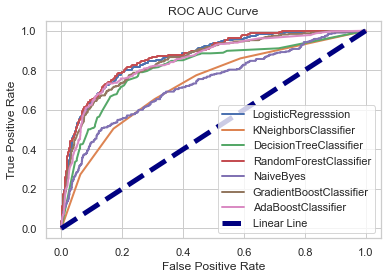

In [181]:
for key in roc_auc_dict:
    clf = roc_auc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key,lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()
plt.show()

# Selecting the Model

Random Forest and Logistic Regression are two best performing model but out of this Random forest is best as it has the highest roc_auc score and the difference between roc_auc score and cv score is least for Random forest. Hence we will select Random forest for our detecting if it will rain tomorrow or not.

# Predict Test cases

In [182]:
#Predicting the test cases
predict_RainfallTomorrow = pd.DataFrame( { 'actual':  y_test,
                                      'predicted': forest.predict( x_test),
                                      'Correctly_Predicted':(y_test)-(forest.predict(x_test))
                                    } )
predict_RainfallTomorrow

,actual,predicted,Correctly_Predicted
6413,0,0,0
6786,0,0,0
4904,0,0,0
1613,0,0,0
2100,0,1,-1
...,...,...,...
107,0,0,0
555,1,1,0
4894,1,1,0
6662,1,0,1


In [183]:
predict_RainfallTomorrow = predict_RainfallTomorrow.reset_index()

In [184]:
predict_RainfallTomorrow['Correctly_Predicted'].value_counts()

 0    1125
-1     127
 1     101
Name: Correctly_Predicted, dtype: int64

If we see the result, out of 1353,1125 (83.15%) predicted correclty using the Random Forest classifier. Hence we see that our model is performing well.

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='count'>

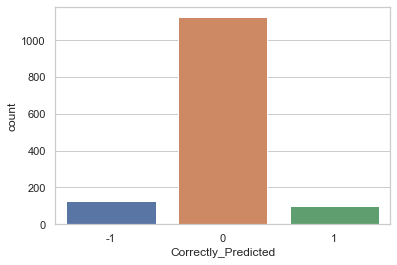

In [186]:
sns.countplot(predict_RainfallTomorrow.Correctly_Predicted)

# Saving the model (RainfallTomorrow)

In [187]:
from joblib import dump , load
dump(forest,'Rainfall_Tomorrow.joblib')
forest_load=load('Rainfall_Tomorrow.joblib')

In [188]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'Rainfall_Tomorrow.joblib')

In [189]:
import joblib
joblib.dump(forest, filename)

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpkxvqvxw5\\Rainfall_Tomorrow.joblib']

In [190]:
joblib.load(filename)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10)

# Problem2 : How much rainfall will be there

Lets import the same dataset to a different dataframe and drop columns,duplicates which we performed above and then fill the missing values in the same way which we performed above.

In [396]:
rainfall=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [397]:
rainfall.drop_duplicates(inplace=True)

In [398]:
# Check nan column percentage
nan_columns = rainfall.apply(lambda x: f'{((x.isnull().sum()/rainfall.shape[0])*100).round(2)} %').sort_values(ascending=True)
nan_columns

Date               0.0 %
Location           0.0 %
Temp9am           0.75 %
Humidity9am        0.8 %
MaxTemp           0.84 %
WindSpeed9am      0.93 %
MinTemp           1.04 %
Temp3pm           1.36 %
Humidity3pm       1.42 %
WindSpeed3pm      1.48 %
WindDir9am       11.74 %
WindGustDir      13.93 %
WindGustSpeed    13.93 %
Pressure9am      19.34 %
Pressure3pm      19.39 %
RainTomorrow      2.04 %
Rainfall          2.04 %
RainToday         2.04 %
Cloud9am          27.6 %
Cloud3pm         28.13 %
WindDir3pm        4.35 %
Evaporation       43.2 %
Sunshine         47.86 %
dtype: object

In [399]:
rainfall.drop(['Evaporation', 'Sunshine'], axis = 1, inplace = True)

In [400]:
rainfall['Date']=pd.to_datetime(df['Date'])
rainfall['MonthOfRainfall']=rainfall['Date'].apply(lambda x:x.month)

#Drop date column
rainfall.drop('Date',inplace=True,axis=1)
rainfall.sample(2)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MonthOfRainfall
2412,Penrith,6.9,25.6,0.0,NNW,65.0,NNW,NW,7.0,24.0,58.0,18.0,NaN,NaN,NaN,NaN,14.6,24.9,No,No,7
3519,Wollongong,19.9,22.5,2.8,S,37.0,WSW,SSE,9.0,26.0,92.0,81.0,1014.1,1014.7,8.0,8.0,20.3,21.3,Yes,Yes,2


In [401]:
categorical_columns = [col for col in rainfall.columns if rainfall[col].dtype == 'object']
rainfall[categorical_columns].isnull().sum()

Location          0
WindGustDir     942
WindDir9am      794
WindDir3pm      294
RainToday       138
RainTomorrow    138
dtype: int64

In [402]:
categorical_columns_with_nan = [x for x in categorical_columns if rainfall[x].isnull().sum()]
for col in categorical_columns_with_nan:
    mode_value = rainfall[col].mode()[0]
    rainfall[col].fillna(mode_value,inplace=True)

In [403]:
numerical_columns = [col for col in rainfall.columns if rainfall[col].dtype != 'object']
rainfall[numerical_columns].isnull().sum()

MinTemp              70
MaxTemp              57
Rainfall            138
WindGustSpeed       942
WindSpeed9am         63
WindSpeed3pm        100
Humidity9am          54
Humidity3pm          96
Pressure9am        1308
Pressure3pm        1311
Cloud9am           1866
Cloud3pm           1902
Temp9am              51
Temp3pm              92
MonthOfRainfall       0
dtype: int64

In [404]:
numerical_columns_with_nan = [x for x in numerical_columns if rainfall[x].isnull().sum()]
for col in numerical_columns_with_nan:
    mean_value = rainfall[col].mean()
    rainfall[col].fillna(mean_value,inplace=True)

In [405]:
rainfall.isnull().sum().sum()

0

In [406]:
# Lets convert the columns which are having data as Yes and No using Label encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in rainfall:
    if rainfall[col].dtype == 'object':
        le.fit(df[col])
        rainfall[col] = le.transform(rainfall[col])
        le_count += 1       
print('%d columns were label encoded successfully' % le_count)

6 columns were label encoded successfully


In [407]:
rainfall.sample(2)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MonthOfRainfall
5259,5,15.0,25.3,2.780148,7,48.0,3,6,24.0,24.0,70.0,31.0,1012.8,1010.5,4.336806,4.320988,17.4,25.2,0,1,11
801,1,17.0,29.7,0.000000,3,28.0,10,1,9.0,17.0,79.0,55.0,1020.1,1016.1,2.000000,4.320988,19.8,27.9,0,1,2


In [408]:
dataToPlot= rainfall.drop(['Rainfall'], axis = 1)

# checking the shape of the dataset
print(rainfall.shape)

(6762, 21)


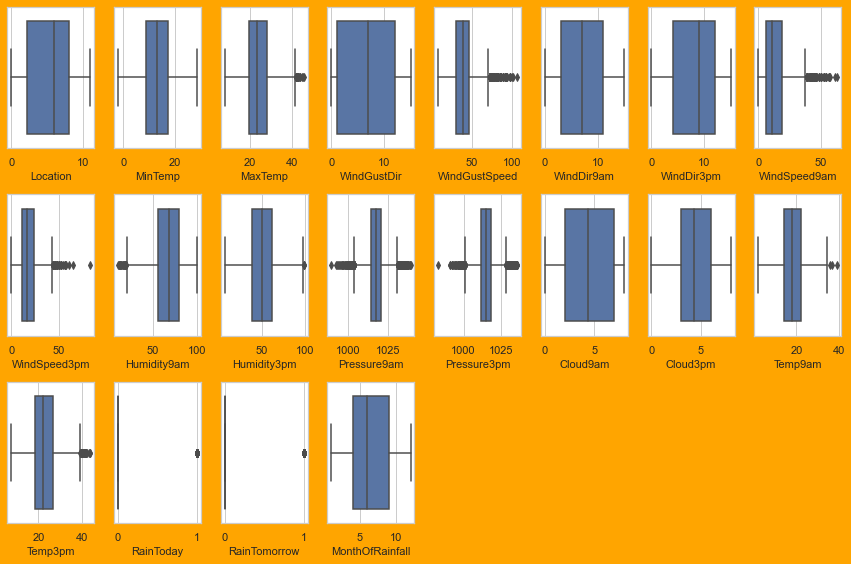

In [409]:
#Lets see data distribution
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=22:
        ax=plt.subplot(3,8,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see the outliers, so we will have to remove them. Lets perform it using zscore.

In [410]:
from scipy.stats import zscore
z_score=abs(zscore(rainfall))
print(rainfall.shape)
rainfall_new=rainfall.loc[(z_score<3).all(axis=1)]
print(rainfall_new.shape)

(6762, 21)
(6460, 21)


In [411]:
loss=(6762-6460)/6762
loss

0.04466134279798876

The data to delete is 4.5%, Its dafe to delete, so lets proceed further now.

In [412]:
rainfall= rainfall_new
rainfall.shape

(6460, 21)

# Skewness

In [413]:
features=rainfall.drop(columns=['Rainfall'])
target=rainfall[["Rainfall"]]

In [414]:
features.shape , target.shape

((6460, 20), (6460, 1))

In [415]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':features.skew()}) 
skew_df

,Skewness
Location,-0.001075
MinTemp,-0.083371
MaxTemp,0.263487
WindGustDir,0.101237
WindGustSpeed,0.478698
WindDir9am,0.209958
WindDir3pm,-0.128440
WindSpeed9am,0.679941
WindSpeed3pm,0.340302
Humidity9am,-0.229874


In [416]:
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) ,"are skewed")

Out of 20 features 3 are skewed


In [417]:
for index in features.skew().index:
    if features.skew().loc[index]>0.5:
        features[index]=np.log1p(features[index])
    if features.skew().loc[index]<-0.5:
        features[index]=np.square(features[index])
print(features.skew())
print("Out of",len(features.skew()),"features",len(features.skew().loc[abs(features.skew())>0.5]) 
      ,"are little skewed and we have improved the skewness to much extent")

Location          -0.001075
MinTemp           -0.083371
MaxTemp            0.263487
WindGustDir        0.101237
WindGustSpeed      0.478698
WindDir9am         0.209958
WindDir3pm        -0.128440
WindSpeed9am      -0.038570
WindSpeed3pm       0.340302
Humidity9am       -0.229874
Humidity3pm        0.160495
Pressure9am        0.059377
Pressure3pm        0.087611
Cloud9am          -0.204151
Cloud3pm          -0.146475
Temp9am           -0.075472
Temp3pm            0.286783
RainToday          1.337215
RainTomorrow       1.331836
MonthOfRainfall    0.029216
dtype: float64
Out of 20 features 2 are little skewed and we have improved the skewness to much extent


In [418]:
x= rainfall.drop('Rainfall',axis=1)
y=rainfall['Rainfall']

In [419]:
x.head(1)

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MonthOfRainfall
0,1,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.320988,16.9,21.8,0,0,12


In [420]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,MonthOfRainfall
0,-1.39056,0.065283,-0.195564,1.220469,0.479851,1.313530,1.372856,0.864774,0.754322,0.202291,-1.558179,-1.753722,-1.432161,1.497191,0.017590,-0.167529,-0.154377,-0.53439,-0.535586,1.646508
1,-1.39056,-1.017551,0.169147,1.411347,0.479851,-0.225075,1.595860,-0.911014,0.533543,-1.394133,-1.393289,-1.247596,-1.308834,0.014571,0.017590,-0.114783,0.271118,-0.53439,-0.535586,1.646508
2,-1.39056,-0.024954,0.268613,1.602225,0.643159,1.313530,1.595860,0.753787,0.975102,-1.748893,-1.118470,-1.771174,-1.150271,0.014571,-0.983893,0.553335,0.083900,-0.53439,-0.535586,1.646508
3,-1.39056,-0.692701,0.649902,-0.497436,-1.153224,0.434327,-1.749201,-0.134107,-0.901524,-1.335006,-1.887961,-0.025914,-0.427926,0.014571,0.017590,0.043456,0.645553,-0.53439,-0.535586,1.646508
4,-1.39056,0.805219,1.362745,1.220469,0.234890,-1.324078,-0.188173,-0.578054,0.312763,0.852686,-0.953580,-1.212691,-1.625961,1.092457,1.605047,-0.009290,1.190187,-0.53439,-0.535586,1.646508


# PCA

In [421]:
from sklearn.decomposition import PCA
pca=PCA()
test=pca.fit(x)

In [422]:
test.explained_variance_ratio_

array([0.24646014, 0.15140073, 0.11627301, 0.08127443, 0.061131  ,
       0.04982105, 0.04574149, 0.03947085, 0.03682748, 0.0344741 ,
       0.0296789 , 0.02586782, 0.02255824, 0.01972281, 0.01564869,
       0.01433109, 0.00523565, 0.00188431, 0.00130488, 0.00089335])

In [423]:
var_cumsum=np.cumsum(test.explained_variance_ratio_)*100
var_cumsum

array([ 24.64601357,  39.78608704,  51.4133876 ,  59.54083033,
        65.65393011,  70.636035  ,  75.21018417,  79.15726906,
        82.84001695,  86.28742667,  89.25531699,  91.84209877,
        94.09792267,  96.0702035 ,  97.63507218,  99.06818124,
        99.59174672,  99.78017792,  99.91066546, 100.        ])

In [424]:
components=np.argmax(var_cumsum>90)
print('Number of components explaning 90% variance are :',components)

Number of components explaning 90% variance are : 11


Text(0, 0.5, 'Comulative explaind variance')

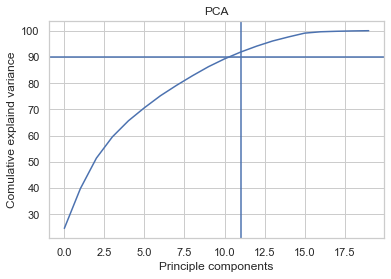

In [425]:
plt.axvline(x=components)
plt.axhline(y=90)
plt.plot(var_cumsum)
plt.title("PCA")
plt.xlabel('Principle components')
plt.ylabel('Comulative explaind variance')

In [426]:
final_pca=PCA(n_components=11)
final=final_pca.fit_transform(x)

In [427]:
x_final=pd.DataFrame(final)
x_final

,0,1,2,3,4,5,6,7,8,9,10
0,0.607033,1.247841,2.153052,-2.538786,1.227755,1.075323,-1.252989,-0.043998,0.307946,0.962183,0.420351
1,0.860933,-0.418311,1.862954,-2.645126,2.086655,0.478473,-1.366582,-0.258545,-0.799367,-0.050754,0.224901
2,1.871147,0.232792,2.946814,-2.892031,0.958890,1.261650,-0.282725,-0.068596,0.032340,0.025406,0.354731
3,0.833976,-2.176798,-0.511496,-0.747024,1.377825,2.429050,-0.478157,0.156321,0.641373,0.748826,-1.134445
4,1.519751,1.120600,-0.779555,-1.382388,1.879262,0.968051,-2.383774,-0.417761,-0.714673,0.736699,0.971020
...,...,...,...,...,...,...,...,...,...,...,...
6455,-0.985593,-2.621719,0.288309,1.593339,-0.016362,0.069148,-0.374942,0.232935,1.222306,0.568659,-1.770434
6456,-0.851260,-2.525309,0.175192,0.500934,-0.356119,-0.191449,-0.650418,-0.092741,1.096156,0.336466,-1.735236
6457,-0.133507,-1.778682,0.727786,-0.258385,-0.084494,-1.096254,-1.118444,-0.653672,0.189404,-0.180336,-1.707600
6458,0.452389,-2.319134,0.294531,-0.207920,-0.341036,-0.317434,0.191097,-0.233534,1.241709,0.009683,-1.474570


In [428]:
x=x_final
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.607033,1.247841,2.153052,-2.538786,1.227755,1.075323,-1.252989,-0.043998,0.307946,0.962183,0.420351
1,0.860933,-0.418311,1.862954,-2.645126,2.086655,0.478473,-1.366582,-0.258545,-0.799367,-0.050754,0.224901
2,1.871147,0.232792,2.946814,-2.892031,0.958890,1.261650,-0.282725,-0.068596,0.032340,0.025406,0.354731
3,0.833976,-2.176798,-0.511496,-0.747024,1.377825,2.429050,-0.478157,0.156321,0.641373,0.748826,-1.134445
4,1.519751,1.120600,-0.779555,-1.382388,1.879262,0.968051,-2.383774,-0.417761,-0.714673,0.736699,0.971020
...,...,...,...,...,...,...,...,...,...,...,...
6455,-0.985593,-2.621719,0.288309,1.593339,-0.016362,0.069148,-0.374942,0.232935,1.222306,0.568659,-1.770434
6456,-0.851260,-2.525309,0.175192,0.500934,-0.356119,-0.191449,-0.650418,-0.092741,1.096156,0.336466,-1.735236
6457,-0.133507,-1.778682,0.727786,-0.258385,-0.084494,-1.096254,-1.118444,-0.653672,0.189404,-0.180336,-1.707600
6458,0.452389,-2.319134,0.294531,-0.207920,-0.341036,-0.317434,0.191097,-0.233534,1.241709,0.009683,-1.474570


# Train Test Split

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression

In [483]:
lr=LinearRegression()
max_r2_score=0
for i in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2=r2_score(y_test,pred_test)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 42 r2_score is:  0.4891626610178854
******************************
At 43 r2_score is:  0.48431645226346054
******************************
At 44 r2_score is:  0.4701256043399328
******************************
At 45 r2_score is:  0.47858131088578526
******************************
At 46 r2_score is:  0.48473328857245546
******************************
At 47 r2_score is:  0.49747822956065757
******************************
At 48 r2_score is:  0.4755856177703789
******************************
At 49 r2_score is:  0.5045083349601195
******************************
At 50 r2_score is:  0.505251378746256
******************************
At 51 r2_score is:  0.45372230704623717
******************************
At 52 r2_score is:  0.4940092135640245
******************************
At 53 r2_score is:  0.4573640294648318
******************************
At 54 r2_score is:  0.4949482386797124
******************************
At 55 r2_score is:  0.47069978515533195
***************

In [485]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 77)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
lr_pred_test=lr.predict(x_test)
r2_final_score=r2_score(y_test,lr_pred_test)
r2_final_score

0.5316613847033402

In [432]:
from sklearn import metrics
# calculate MAE, MSE, RMSE on Train Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

mean_absolute_error : 1.5959775471999227
mean_squared_error :  11.602931479013602
root_mean_squared_error :  3.406307601936972


In [486]:
# calculate MAE, MSE, RMSE on Test Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lr_pred_test))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lr_pred_test))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lr_pred_test)))

mean_absolute_error : 1.5550920384521167
mean_squared_error :  11.022936749791263
root_mean_squared_error :  3.3200808348278605


In [492]:
from sklearn.model_selection import cross_val_score
lrcv_score=cross_val_score(lr,x,y,cv=7,scoring='r2').mean()
lrcv_score

0.49086547137162606

In [493]:
lr_data = {'Model': ['Linear Regression'], 
           'MAE': metrics.mean_absolute_error(y_test, lr_pred_test),'MSE':metrics.mean_squared_error(y_test, lr_pred_test),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, lr_pred_test)),
           'R2 Score': r2_final_score,
           'CV Score': lrcv_score
          }

df_LR = pd.DataFrame(lr_data)
df_LR

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,1.555092,11.022937,3.320081,0.531661,0.490865


# Ridge

In [443]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1,max_iter=20, normalize=True)

max_r2_score=0
for i in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state = i)
    ridgeReg.fit(x_train,y_train)
    ridge_pred_train=ridgeReg.predict(x_train)
    ridge_pred=ridgeReg.predict(x_test)
    r2=r2_score(y_test,ridge_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 42 r2_score is:  0.4935815612660769
******************************
At 43 r2_score is:  0.4770532646132928
******************************
At 44 r2_score is:  0.4658155133007479
******************************
At 45 r2_score is:  0.47207335186820587
******************************
At 46 r2_score is:  0.47667216891166486
******************************
At 47 r2_score is:  0.49395441243340377
******************************
At 48 r2_score is:  0.4704133769083325
******************************
At 49 r2_score is:  0.4980499203118913
******************************
At 50 r2_score is:  0.4923273970082418
******************************
At 51 r2_score is:  0.4563425534697161
******************************
At 52 r2_score is:  0.48594089154697007
******************************
At 53 r2_score is:  0.4511429034217711
******************************
At 54 r2_score is:  0.503476697152924
******************************
At 55 r2_score is:  0.4687215935939306
*****************

In [445]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 77)
ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)
ridge_pred_train = ridgeReg.predict(x_train)
r2_final_score=r2_score(y_test,ridge_pred)

In [448]:
ridge_cvScore=cross_val_score(ridgeReg,x,y,cv=7,scoring='r2').mean()
ridge_cvScore

0.49086547137162606

In [449]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("Cross Validation Score : ",ridge_cvScore)

r2_score 0.5238994694019897
mean_absolute_error : 1.5679449692076606
mean_squared_error :  11.205623162206408
root_mean_squared_error :  3.347480121256347
Cross Validation Score :  0.49086547137162606


In [450]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, ridge_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, ridge_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))
print ("Cross Validation Score : ", ridge_cvScore)

r2_score 0.5238994694019897
mean_absolute_error : 1.5981412223158689
mean_squared_error :  11.708389200872828
root_mean_squared_error :  3.421752358203736
Cross Validation Score :  0.49086547137162606


In [451]:
ridge_data = {'Model': ['Ridge'], 
           'MAE': metrics.mean_absolute_error(y_test, ridge_pred),'MSE':metrics.mean_squared_error(y_test, ridge_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
           'R2 Score': r2_final_score,
           'CV Score': ridge_cvScore
             }  

df_Ridge = pd.DataFrame(ridge_data)  
df_Ridge

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Ridge,1.567945,11.205623,3.34748,0.523899,0.490865


# KNeighborsRegressor

In [452]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

max_r2_score=0
for i in range(40,101):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state = i)
    knn.fit(x_train,y_train)
    
    knn_pred_train=knn.predict(x_train)
    knn_pred=knn.predict(x_test)
    
    r2=r2_score(y_test,knn_pred)
    
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 40 r2_score is:  0.44053463537508153
******************************
At 41 r2_score is:  0.4599167035014212
******************************
At 42 r2_score is:  0.4372252317660553
******************************
At 43 r2_score is:  0.48353914249688756
******************************
At 44 r2_score is:  0.41637921381010834
******************************
At 45 r2_score is:  0.48364958093439403
******************************
At 46 r2_score is:  0.46996769383008785
******************************
At 47 r2_score is:  0.43993438157999276
******************************
At 48 r2_score is:  0.39966997952841554
******************************
At 49 r2_score is:  0.4662681887773842
******************************
At 50 r2_score is:  0.4488523554331454
******************************
At 51 r2_score is:  0.4001690203607656
******************************
At 52 r2_score is:  0.4227383630630457
******************************
At 53 r2_score is:  0.42320923056564197
************

In [459]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state = 86)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
r2_final_score=r2_score(y_test,knn_pred)
r2_final_score

0.48443168897592004

In [460]:
knn_cvScore=cross_val_score(knn,x,y,cv=5,scoring='r2').mean()
knn_cvScore

0.48892923572838837

In [461]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, knn_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, knn_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.48443168897592004
mean_absolute_error : 1.3396701692690811
mean_squared_error :  11.464758419827383
root_mean_squared_error :  3.385964917099317
Cross Validation Score :  0.48892923572838837


In [462]:
#Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, knn_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, knn_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, knn_pred_train)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.48443168897592004
mean_absolute_error : 1.1757698036785273
mean_squared_error :  8.827984522292027
root_mean_squared_error :  2.9711924411407664
Cross Validation Score :  0.48892923572838837


In [463]:
knn_data = {'Model': ['KNN'], 
           'MAE': metrics.mean_absolute_error(y_test, knn_pred),'MSE':metrics.mean_squared_error(y_test, knn_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, knn_pred)),
           'R2 Score': r2_final_score,
           'CV Score': knn_cvScore
           }  

df_knn = pd.DataFrame(knn_data)  
df_knn

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,KNN,1.33967,11.464758,3.385965,0.484432,0.488929


# RandomForestRegressor

In [466]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)

In [469]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state = 77)
rfr=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=10,min_samples_split=5,min_samples_leaf=2)
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)
r2_final_score=r2_score(y_test,rfr_pred)
r2_final_score

0.16400802581489615

In [468]:
rfr_cvScore=cross_val_score(rfr,x,y,cv=5,scoring='r2').mean()
rfr_cvScore

0.16187024225861352

In [470]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, rfr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, rfr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print("Cross Validation Score : ",rfr_cvScore)

r2_score 0.16400802581489615
mean_absolute_error : 1.705679400991423
mean_squared_error :  19.676119700141353
root_mean_squared_error :  4.435777237434422
Cross Validation Score :  0.16187024225861352


In [471]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, rfr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, rfr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, rfr_pred_train)))
print ("Cross Validation Score : ", rfr_cvScore)

r2_score 0.16400802581489615
mean_absolute_error : 1.3181739898118863
mean_squared_error :  14.979458204951813
root_mean_squared_error :  3.8703305033229154
Cross Validation Score :  0.16187024225861352


In [472]:
randomForest_data = {'Model': ['Random Forest'], 
           'MAE': metrics.mean_absolute_error(y_test, rfr_pred),'MSE':metrics.mean_squared_error(y_test, rfr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)),
           'R2 Score': r2_score(y_test,rfr_pred),
           'CV Score': rfr_cvScore
            }  

df_RF = pd.DataFrame(randomForest_data)  
df_RF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Random Forest,1.705679,19.67612,4.435777,0.164008,0.16187


# GradientBoostingRegressor

In [473]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [474]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state = 77)
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)
gbr_pred_train = gbr.predict(x_train)
r2_final_score=r2_score(y_test,gbr_pred)
r2_final_score

0.5091203734968479

In [475]:
gbr_cvScore=cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()
gbr_cvScore

0.4684440730593721

In [476]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, rfr_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, rfr_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print("Cross Validation Score : ",rfr_cvScore)

r2_score 0.5091203734968479
mean_absolute_error : 1.705679400991423
mean_squared_error :  19.676119700141353
root_mean_squared_error :  4.435777237434422
Cross Validation Score :  0.16187024225861352


In [477]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, rfr_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, rfr_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, rfr_pred_train)))
print ("Cross Validation Score : ", rfr_cvScore)

r2_score 0.5091203734968479
mean_absolute_error : 1.3181739898118863
mean_squared_error :  14.979458204951813
root_mean_squared_error :  3.8703305033229154
Cross Validation Score :  0.16187024225861352


In [478]:
gradient_data = {'Model': ['Gradient Boost Regressor'], 
           'MAE': metrics.mean_absolute_error(y_test, gbr_pred),'MSE':metrics.mean_squared_error(y_test, gbr_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, gbr_pred)),
           'R2 Score': r2_score(y_test,gbr_pred),
           'CV Score': gbr_cvScore
            }  

df_GR = pd.DataFrame(gradient_data)  
df_GR

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Gradient Boost Regressor,1.48425,11.553468,3.399039,0.50912,0.468444


In [479]:
modelDF=pd.concat([df_LR,df_Ridge,df_knn,df_RF,df_GR]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,1.555092,11.022937,3.320081,0.531661,0.490865
1,Ridge,1.567945,11.205623,3.347480,0.523899,0.490865
2,KNN,1.339670,11.464758,3.385965,0.484432,0.488929
3,Random Forest,1.705679,19.676120,4.435777,0.164008,0.161870
4,Gradient Boost Regressor,1.484250,11.553468,3.399039,0.509120,0.468444


Linear Regression has the least difference between R2 Score and CV Score, therefore, we will select this model for predicting the amount of rainfall.

<AxesSubplot:ylabel='Density'>

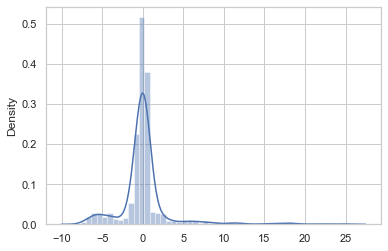

In [495]:
predictions=lr.predict(x_test)
sns.distplot(np.array(y_test)-predictions)  # Convert y_test into array as it is a Dataframe

# Save the model

In [496]:
from joblib import dump , load
dump(lr,'Rainfall.joblib')
lr_load=load('Rainfall.joblib')

In [497]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'Rainfall.joblib')

In [498]:
import joblib
joblib.dump(lr, filename) 

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpswgb16f_\\Rainfall.joblib']

In [499]:
joblib.load(filename)

LinearRegression()